In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import seaborn as sns
import glob
import cv2
import re
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

# data preparation

In [13]:
path = glob.glob("train/*.jpg")
cv_img = []
for img in path:
    n = cv2.imread(img)
    gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    cv_img.append(blur)

list1=[] 
angle1=[]
angle2=[]
variancex=[]
variancey=[]
list2=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        laplacian = cv2.Laplacian(i,cv2.CV_64F)
        laplacian
       #plt.imshow(laplacian,cmap='gray')
       #plt.show()        
        _,thresh = cv2.threshold(laplacian,15,255,cv2.THRESH_BINARY)
      #  plt.imshow(thresh,cmap='gray')
       # plt.show()
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            list1.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            list2.append(corr[0,1])
        for k in varx:
            variancex.append(k)
        for l in vary:
            variancey.append(l)
        for m in theta1:
            angle1.append(m)
        for n in theta2:
            angle2.append(n)
covariance=list1[0::2]
correlation=list2[0::2]



C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_d

In [14]:
sobelx_cov=[] 
angle1_sobelx=[]
angle2_sobelx=[]
variancex_sobelx=[]
variancey_sobelx=[]
sobelx_corr=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        sobelx = cv2.Sobel(i,cv2.CV_64F,1,0,ksize=5)
        sobelx
       #plt.imshow(laplacian,cmap='gray')
       #plt.show()        
        _,thresh = cv2.threshold(sobelx,15,255,cv2.THRESH_BINARY)
      #  plt.imshow(thresh,cmap='gray')
       # plt.show()
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            sobelx_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            sobelx_corr.append(corr[0,1])
        for k in varx:
            variancex_sobelx.append(k)
        for l in vary:
            variancey_sobelx.append(l)
        for m in theta1:
            angle1_sobelx.append(m)
        for n in theta2:
            angle2_sobelx.append(n)
covariance_sobelx=sobelx_cov[0::2]
correlation_sobelx=sobelx_corr[0::2]

In [15]:
angle1_sobely=[]
angle2_sobely=[]
variancex_sobely=[]
variancey_sobely=[]
sobely_corr=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        sobely = cv2.Sobel(i,cv2.CV_64F,0,1,ksize=5)
        sobely
       #plt.imshow(laplacian,cmap='gray')
       #plt.show()        
        _,thresh = cv2.threshold(sobely,15,255,cv2.THRESH_BINARY)
      #  plt.imshow(thresh,cmap='gray')
       # plt.show()
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            sobely_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            sobely_corr.append(corr[0,1])
        for k in varx:
            variancex_sobely.append(k)
        for l in vary:
            variancey_sobely.append(l)
        for m in theta1:
            angle1_sobely.append(m)
        for n in theta2:
            angle2_sobely.append(n)
covariance_sobely=sobely_cov[0::2]
correlation_sobely=sobely_corr[0::2]

In [16]:
sobel_cov=[] 
angle1_sobel=[]
angle2_sobel=[]
variancex_sobel=[]
variancey_sobel=[]
sobel_corr=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        sobelx = cv2.Sobel(i,cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(i,cv2.CV_64F,0,1,ksize=5)
        sobel = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
        sobel_ = np.maximum(sobel,50)
        sobel_[sobel_==50]=0
        _, thresh = cv2.threshold(sobel,15,255,cv2.THRESH_BINARY)
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            sobel_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            sobel_corr.append(corr[0,1])
        for k in varx:
            variancex_sobel.append(k)
        for l in vary:
            variancey_sobel.append(l)
        for m in theta1:
            angle1_sobel.append(m)
        for n in theta2:
            angle2_sobel.append(n)
covariance_sobel=sobel_cov[0::2]
correlation_sobel=sobel_corr[0::2]

In [90]:
canny_cov=[] 
canny_corr=[]
angle1_canny=[]
angle2_canny=[]
variancex_canny=[]
variancey_canny=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        canny = cv2.Canny(i,cv2.CV_8U,100)
        canny
       #plt.imshow(laplacian,cmap='gray')
       #plt.show()        
        _,thresh = cv2.threshold(canny,15,255,cv2.THRESH_BINARY)
      #  plt.imshow(thresh,cmap='gray')
       # plt.show()
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            canny_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            canny_corr.append(corr[0,1])
        for k in varx:
            variancex_canny.append(k)
        for l in vary:
            variancey_canny.append(l)
        for m in theta1:
            angle1_canny.append(m)
        for n in theta2:
            angle2_canny.append(n)
covariance_canny=canny_cov[0::2]
correlation_canny=canny_corr[0::2]

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_d

In [18]:
scharrx_cov=[] 
angle1_scharrx=[]
angle2_scharrx=[]
variancex_scharrx=[]
variancey_scharrx=[]
scharrx_corr=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        scharrx = cv2.Scharr(i,cv2.CV_64F,1,0)
        scharrx
       #plt.imshow(laplacian,cmap='gray')
       #plt.show()        
        _,thresh = cv2.threshold(scharrx,15,255,cv2.THRESH_BINARY)
      #  plt.imshow(thresh,cmap='gray')
       # plt.show()
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            scharrx_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            scharrx_corr.append(corr[0,1])
        for k in varx:
            variancex_scharrx.append(k)
        for l in vary:
            variancey_scharrx.append(l)
        for m in theta1:
            angle1_scharrx.append(m)
        for n in theta2:
            angle2_scharrx.append(n)
covariance_scharrx=scharrx_cov[0::2]
correlation_scharrx=scharrx_corr[0::2]

In [19]:
scharry_cov=[] 
angle1_scharry=[]
angle2_scharry=[]
variancex_scharry=[]
variancey_scharry=[]
scharry_corr=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        scharry = cv2.Scharr(i,cv2.CV_64F,0,1)
        scharry
       #plt.imshow(laplacian,cmap='gray')
       #plt.show()        
        _,thresh = cv2.threshold(scharry,15,255,cv2.THRESH_BINARY)
      #  plt.imshow(thresh,cmap='gray')
       # plt.show()
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            scharry_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            scharry_corr.append(corr[0,1])
        for k in varx:
            variancex_scharry.append(k)
        for l in vary:
            variancey_scharry.append(l)
        for m in theta1:
            angle1_scharry.append(m)
        for n in theta2:
            angle2_scharry.append(n)
covariance_scharry=scharry_cov[0::2]
correlation_scharry=scharry_corr[0::2]

In [20]:
scharry_cov=[] 
angle1_scharry=[]
angle2_scharry=[]
variancex_scharry=[]
variancey_scharry=[]
scharry_corr=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        scharry = cv2.Scharr(i,cv2.CV_64F,0,1)
        scharry
       #plt.imshow(laplacian,cmap='gray')
       #plt.show()        
        _,thresh = cv2.threshold(scharry,15,255,cv2.THRESH_BINARY)
      #  plt.imshow(thresh,cmap='gray')
       # plt.show()
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            scharry_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            scharry_corr.append(corr[0,1])
        for k in varx:
            variancex_scharry.append(k)
        for l in vary:
            variancey_scharry.append(l)
        for m in theta1:
            angle1_scharry.append(m)
        for n in theta2:
            angle2_scharry.append(n)
covariance_scharry=scharry_cov[0::2]
correlation_scharry=scharry_corr[0::2]

In [21]:
scharr_cov=[] 
angle1_scharr=[]
angle2_scharr=[]
variancex_scharr=[]
variancey_scharr=[]
scharr_corr=[]
for i in cv_img:
        #plt.imshow(i,cmap='gray')
        #plt.show()
        scharrx = cv2.Scharr(i,cv2.CV_64F,1,0)
        scharry = cv2.Scharr(i,cv2.CV_64F,0,1)
        scharr = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)
        #sobel_ = np.maximum(sobel,50)
        #sobel_[sobel_==50]=0
        _, thresh = cv2.threshold(scharr,15,255,cv2.THRESH_BINARY)
        x,y = np.nonzero(thresh)
        x = x - np.mean(x)
        y = y - np.mean(y)
        coords = np.vstack([x, y])
        cov=np.cov(x,y)
        cov=np.nan_to_num(cov)
        corr=np.corrcoef(x,y)
        corr=np.nan_to_num(corr)
        evals, evecs = np.linalg.eig(cov)
        sort_indices = np.argsort(evals)[::-1]
        x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
        x_v2, y_v2 = evecs[:, sort_indices[1]]
        varx=[np.var(x)]
        varx=np.nan_to_num(varx)
        vary=[np.var(y)]
        vary=np.nan_to_num(vary)
        theta1=[np.arctan(y_v1/x_v1)]
        theta1=np.nan_to_num(theta1)
        theta2=[math.atan(y_v2/x_v2)]
        theta2=np.nan_to_num(theta2)
        #print(cov)
        
        for i in cov:
            #print(i)
            scharr_cov.append(cov[0,1])
            #listu.append(listnew[0])
        #print(listu)
        #print(listu)
        for j in corr:
            scharr_corr.append(corr[0,1])
        for k in varx:
            variancex_scharr.append(k)
        for l in vary:
            variancey_scharr.append(l)
        for m in theta1:
            angle1_scharr.append(m)
        for n in theta2:
            angle2_scharr.append(n)
covariance_scharr=scharr_cov[0::2]
correlation_scharr=scharr_corr[0::2]

In [91]:
names=os.listdir("train")
print(names)

['100_0.JPG', '100_1.JPG', '10_0.JPG', '10_1.JPG', '11_0.JPG', '11_1.JPG', '12_0.JPG', '12_1.JPG', '13_0.JPG', '13_1.JPG', '14_0.JPG', '14_1.JPG', '15_0.JPG', '15_1.JPG', '16_0.JPG', '16_1.JPG', '17_0.JPG', '17_1.JPG', '18_0.JPG', '18_1.JPG', '19_0.JPG', '19_1.JPG', '1_0.JPG', '1_1.JPG', '20_0.JPG', '20_1.JPG', '21_0.JPG', '21_1.JPG', '22_0.JPG', '22_1.JPG', '23_0.JPG', '23_1.JPG', '24_0.JPG', '24_1.JPG', '25_0.JPG', '25_1.JPG', '26_0.JPG', '26_1.JPG', '27_0.JPG', '27_1.JPG', '28_0.JPG', '28_1.JPG', '29_0.JPG', '29_1.JPG', '2_0.JPG', '2_1.JPG', '30_0.JPG', '30_1.JPG', '31_0.JPG', '31_1.JPG', '32_0.JPG', '32_1.JPG', '33_0.JPG', '33_1.JPG', '34_0.JPG', '34_1.JPG', '35_0.JPG', '35_1.JPG', '36_0.JPG', '36_1.JPG', '37_0.JPG', '37_1.JPG', '38_0.JPG', '38_1.JPG', '39_0.JPG', '39_1.JPG', '3_0.JPG', '3_1.JPG', '40_0.JPG', '40_1.JPG', '41_0.JPG', '41_1.JPG', '42_0.JPG', '42_1.JPG', '43_0.JPG', '43_1.JPG', '44_0.JPG', '44_1.JPG', '45_0.JPG', '45_1.JPG', '46_0.JPG', '46_1.JPG', '47_0.JPG', '47_1.J

In [24]:
string = ''.join(names)

In [ ]:
#names

In [25]:
result=re.findall(r'\_(\d)',string)

In [27]:
result = list(map(int, result))

In [92]:
print(result)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [29]:
birdsdict={'lapCovariance':covariance,'lapCorrelation':correlation,'lapVarx':variancex,'lapVary':variancey,'lapAngle1':angle1,'lapAngle2':angle2,'cannyCovariance':covariance_canny,'cannyCorrelation':correlation_canny,'cannyVariancex':variancex_canny,'cannyVariancey':variancey_canny,'cannyAngle1':angle1_canny,'cannyAngle2':angle2_canny,'sobelxCovariance':covariance_sobelx,'sobelxCorrelation':correlation_sobelx,'sobelxVariancex':variancex_sobelx,'sobelxVariancey':variancey_sobelx,'sobelxAngle1':angle1_sobelx,'sobelxAngle2':angle2_sobelx,'sobelyCovariance':covariance_sobely,'sobelyCorrelation':correlation_sobely,'sobelyVariancex':variancex_sobely,'sobelyVariancey':variancey_sobely,'sobelyAngle1':angle1_sobely,'sobelyAngle2':angle2_sobely,'sobelCovariance':covariance_sobel,'sobelCorrelation':correlation_sobel,'sobelVariancex':variancex_sobel,'sobelVariancey':variancey_sobel,'sobelAngle1':angle1_sobel,'sobelAngle2':angle2_sobel,'scharrxCovariance':covariance_scharrx,'scharrxCorrelation':correlation_scharrx,'scharrxVariancex':variancex_scharrx,'scharrxVariancey':variancey_scharrx,'scharrxAngle1':angle1_scharrx,'scharrxAngle2':angle2_scharrx,'scharryCovariance':covariance_scharry,'scharryCorrelation':correlation_scharry,'scharryVariancex':variancex_scharry,'scharryVariancey':variancey_scharry,'scharryAngle1':angle1_scharry,'scharryAngle2':angle2_scharry,'scharrCovariance':covariance_scharr,'scharrCorrelation':correlation_scharr,'scharrVariancex':variancex_scharr,'scharrVariancey':variancey_scharr,'scharrAngle1':angle1_scharr,'scharrAngle2':angle2_scharr,'morCovariance':covariance_scharr,'Birds':result}

In [30]:
Birds_feature_extraction=pd.DataFrame(birdsdict)

In [31]:
Birds_feature_extraction.head()

,lapCovariance,lapCorrelation,lapVarx,lapVary,lapAngle1,lapAngle2,cannyCovariance,cannyCorrelation,cannyVariancex,cannyVariancey,...,scharryAngle1,scharryAngle2,scharrCovariance,scharrCorrelation,scharrVariancex,scharrVariancey,scharrAngle1,scharrAngle2,morCovariance,Birds
0,0.000000,0.000000,0.00,0.0,1.570796,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.246638,-0.324159,56.353865,0.013545,4197.045692,4123.545144,0.496445,-1.074351,56.353865,0
1,1224.500000,0.916830,1245.76,916.4,0.702122,-0.868674,-819.296059,-0.370552,3223.406704,1515.470111,...,-0.721734,0.849062,-622.370488,-0.164762,3809.698812,3744.844937,-0.759369,0.811427,-622.370488,1
2,0.000000,0.000000,0.00,0.0,1.570796,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.085767,0.485029,-649.431707,-0.143338,4447.374444,4613.985525,-0.849199,0.721598,-649.431707,0
3,-5.222222,-0.938949,10.44,2.4,-0.431611,1.139185,24.689227,0.151402,244.059949,107.755746,...,-1.357655,0.213142,-225.156104,-0.055080,3680.089795,4539.588135,-1.329518,0.241279,-225.156104,1
4,0.000000,0.000000,0.00,0.0,1.570796,0.000000,147.069771,0.073010,1614.040730,2486.878890,...,0.278267,-1.292529,116.928548,0.028492,4108.420818,4098.802365,0.764844,-0.805953,116.928548,0


In [32]:
x = Birds_feature_extraction.iloc[:,:-1]
y = Birds_feature_extraction.iloc[:,-1:]

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x,y)
from sklearn.feature_selection import RFE

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# machine learning

In [34]:
Birds_feature_extraction.isnull().sum()

lapCovariance         0
lapCorrelation        0
lapVarx               0
lapVary               0
lapAngle1             0
lapAngle2             0
cannyCovariance       0
cannyCorrelation      0
cannyVariancex        0
cannyVariancey        0
cannyAngle1           0
cannyAngle2           0
sobelxCovariance      0
sobelxCorrelation     0
sobelxVariancex       0
sobelxVariancey       0
sobelxAngle1          0
sobelxAngle2          0
sobelyCovariance      0
sobelyCorrelation     0
sobelyVariancex       0
sobelyVariancey       0
sobelyAngle1          0
sobelyAngle2          0
sobelCovariance       0
sobelCorrelation      0
sobelVariancex        0
sobelVariancey        0
sobelAngle1           0
sobelAngle2           0
scharrxCovariance     0
scharrxCorrelation    0
scharrxVariancex      0
scharrxVariancey      0
scharrxAngle1         0
scharrxAngle2         0
scharryCovariance     0
scharryCorrelation    0
scharryVariancex      0
scharryVariancey      0
scharryAngle1         0
scharryAngle2   

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (160, 49)
x_test = (40, 49)
y_train = (160, 1)
y_test = (40, 1)


In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
from sklearn.feature_selection import RFE

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
selector = RFE(logmodel)
selector.fit(x_train,y_train)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [60]:
x_birds = x_train[x_train.columns[selector.support_]]
x_birds.head()

,lapCorrelation,lapAngle1,lapAngle2,cannyCorrelation,cannyAngle1,cannyAngle2,sobelxCovariance,sobelxAngle1,sobelxAngle2,sobelyCovariance,...,sobelAngle2,scharrxCovariance,scharrxCorrelation,scharrxAngle1,scharrxAngle2,scharryAngle1,scharryAngle2,scharrCorrelation,scharrAngle1,scharrAngle2
134,0.0,1.570796,0.0,0.000000,1.570796,0.000000,20.651880,0.110894,-1.459902,48.018608,...,-1.262413,207.509342,0.049987,0.273392,-1.297404,0.296536,-1.274260,0.060187,0.317724,-1.253072
66,0.0,1.570796,0.0,0.000000,1.570796,0.000000,-185.720814,-0.977065,0.593732,161.688685,...,0.054889,-197.499644,-0.051260,-1.044831,0.525965,1.395749,-0.175047,-0.059433,-1.292293,0.278503
26,0.0,1.570796,0.0,0.996995,0.313667,-1.257129,39.176362,0.091106,-1.479690,142.541107,...,-1.042255,112.795054,0.028313,0.165454,-1.405343,0.892685,-0.678111,0.052116,0.396834,-1.173963
113,0.0,1.570796,0.0,0.000000,1.570796,0.000000,-27.432522,-1.314483,0.256314,281.755280,...,-0.515984,64.954635,0.015500,1.202888,-0.367909,0.800732,-0.770065,0.213079,0.809914,-0.760882
168,0.0,1.570796,0.0,0.000000,1.570796,0.000000,35.436993,0.466251,-1.104546,75.181117,...,-0.723561,46.749750,0.011228,0.861621,-0.709175,1.415876,-0.154920,0.004479,1.319390,-0.251406


In [61]:
train = pd.concat((x_train,y_train),axis=1)
test = pd.concat((x_test,y_test),axis=1)

In [63]:
train.keys()

Index(['lapCovariance', 'lapCorrelation', 'lapVarx', 'lapVary', 'lapAngle1',
       'lapAngle2', 'cannyCovariance', 'cannyCorrelation', 'cannyVariancex',
       'cannyVariancey', 'cannyAngle1', 'cannyAngle2', 'sobelxCovariance',
       'sobelxCorrelation', 'sobelxVariancex', 'sobelxVariancey',
       'sobelxAngle1', 'sobelxAngle2', 'sobelyCovariance', 'sobelyCorrelation',
       'sobelyVariancex', 'sobelyVariancey', 'sobelyAngle1', 'sobelyAngle2',
       'sobelCovariance', 'sobelCorrelation', 'sobelVariancex',
       'sobelVariancey', 'sobelAngle1', 'sobelAngle2', 'scharrxCovariance',
       'scharrxCorrelation', 'scharrxVariancex', 'scharrxVariancey',
       'scharrxAngle1', 'scharrxAngle2', 'scharryCovariance',
       'scharryCorrelation', 'scharryVariancex', 'scharryVariancey',
       'scharryAngle1', 'scharryAngle2', 'scharrCovariance',
       'scharrCorrelation', 'scharrVariancex', 'scharrVariancey',
       'scharrAngle1', 'scharrAngle2', 'morCovariance', 'Birds'],
      dtype='ob

In [81]:
model=smf.glm(formula='Birds~lapCorrelation+lapAngle1+lapAngle2+cannyCorrelation+cannyAngle1+cannyAngle2+sobelxCovariance+sobelxAngle1+sobelxAngle2+sobelyCovariance+sobelyAngle1+sobelyAngle2+sobelVariancey+sobelAngle1+sobelAngle2+scharrxCovariance+scharrxCorrelation+scharrxAngle1+scharrxAngle2+scharryAngle1+scharryAngle2+scharrCorrelation+scharrAngle1+scharrAngle2',data=train,family=sm.families.Binomial()).fit()
print(model.summary())              

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Birds   No. Observations:                  160
Model:                            GLM   Df Residuals:                      135
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.301
Date:                Tue, 09 Apr 2019   Deviance:                       124.60
Time:                        13:10:34   Pearson chi2:                     161.
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.8894      8.748     -0.216      0.829     -19.036      15.257
lapCorrelation        -0.543

In [42]:
def prediction(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24):

    Varx= x1
    Angle1 = x2   
    lnor = model.params['lapCorrelation']*x1 + model.params['lapAngle1']*x2 + model.params['lapAngle2']*x3 + model.params['cannyCorrelation']*x4 + model.params['cannyAngle1']*x5 + model.params['cannyAngle2']*x6 + model.params['sobelxCovariance']*x7  + model.params['sobelxAngle1']*x8 + model.params['sobelxAngle2']*x9 + model.params['sobelyCovariance']*x10 + model.params['sobelyAngle1']*x11 + model.params['sobelyAngle2']*x12 + model.params['sobelVariancey']*x13 +  model.params['sobelAngle1']*x14  + model.params['sobelAngle2']*x15 + model.params['scharrxCovariance']*x16 + model.params['scharrxCorrelation']*x17 + model.params['scharrxAngle1']*x18 + model.params['scharrxAngle2']*x19 + model.params['scharryAngle1']*x20  + model.params['scharryAngle2']*x21 +  model.params['scharrCorrelation']*x22 + model.params['scharrAngle1']*x23 + model.params['scharrAngle2']*x24
    oddsratio = np.exp(lnor)
    p = oddsratio/(oddsratio+1)    

    return p

In [43]:
def predict(prob,thresh=0.5):
    if prob > thresh:
        return 1
    else:
        return 0

In [44]:
x_birds.keys()

Index(['lapCorrelation', 'lapAngle1', 'lapAngle2', 'cannyCorrelation',
       'cannyAngle1', 'cannyAngle2', 'sobelxCovariance', 'sobelxAngle1',
       'sobelxAngle2', 'sobelyCovariance', 'sobelyAngle1', 'sobelyAngle2',
       'sobelVariancey', 'sobelAngle1', 'sobelAngle2', 'scharrxCovariance',
       'scharrxCorrelation', 'scharrxAngle1', 'scharrxAngle2', 'scharryAngle1',
       'scharryAngle2', 'scharrCorrelation', 'scharrAngle1', 'scharrAngle2'],
      dtype='object')

In [45]:
prob = prediction(train['lapCorrelation'],train['lapAngle1'],train['lapAngle2'],train['cannyCorrelation'],train['cannyAngle1'],train['cannyAngle2'],train['sobelxCovariance'],train['sobelxAngle1'],train['sobelxAngle2'],train['sobelyCovariance'],train['sobelyAngle1'],train['sobelyAngle2'],train['sobelVariancey'],train['sobelAngle1'],train['sobelAngle2'],train['scharrxCovariance'],train['scharrxCorrelation'],train['scharrxAngle1'],train['scharrxAngle2'],train['scharryAngle1'],train['scharryAngle2'],train['scharrCorrelation'],train['scharrAngle1'],train['scharrAngle2'])

In [46]:
y_pred = prob.apply(predict)

In [47]:
y_true = train['Birds']

In [48]:
from pandas_ml import ConfusionMatrix

In [49]:
cm = ConfusionMatrix(y_true,y_pred)
print(cm)

Predicted  False  True  __all__
Actual                         
False         39    41       80
True           1    79       80
__all__       40   120      160


In [50]:
cm.stats_overall

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.7375),
             ('95% CI', (0.6621798680048558, 0.803802817410914)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.6802139128726792),
             ('Kappa', 0.4750000000000001),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [64]:
prob = prediction(test['lapCorrelation'],test['lapAngle1'],test['lapAngle2'],test['cannyCorrelation'],test['cannyAngle1'],test['cannyAngle2'],test['sobelxCovariance'],test['sobelxAngle1'],test['sobelxAngle2'],test['sobelyCovariance'],test['sobelyAngle1'],test['sobelyAngle2'],test['sobelVariancey'],test['sobelAngle1'],test['sobelAngle2'],test['scharrxCovariance'],test['scharrxCorrelation'],test['scharrxAngle1'],test['scharrxAngle2'],test['scharryAngle1'],test['scharryAngle2'],test['scharrCorrelation'],test['scharrAngle1'],test['scharrAngle2'])

In [65]:
y_pred = prob.apply(predict)

In [66]:
y_true = test['Birds']

In [67]:
cm_test = ConfusionMatrix(y_true,y_pred)
print(cm_test)

Predicted  False  True  __all__
Actual                         
False          7    13       20
True           3    17       20
__all__       10    30       40


In [68]:
cm_test.stats_overall

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.6),
             ('95% CI', (0.43326705219329664, 0.7513500134122563)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9884386387990133),
             ('Kappa', 0.19999999999999996),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [70]:
print(model.summary())
print('INFO: Null deviance =',model.null_deviance)
print('INFO: Residual deviance =',model.deviance)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Birds   No. Observations:                  160
Model:                            GLM   Df Residuals:                      135
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.301
Date:                Tue, 09 Apr 2019   Deviance:                       124.60
Time:                        13:03:14   Pearson chi2:                     161.
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.8894      8.748     -0.216      0.829     -19.036      15.257
lapCorrelation        -0.543

In [72]:
from scipy.stats import chi2

In [77]:
dfreedom=200-1-(24-1)

In [78]:
print('INFO: Critical Value of chi2 =',chi2.ppf(0.95,dfreedom))
print('INFO: Pearson chi2 =',model.pearson_chi2)
print('INFO: P-value chi2 =',1-chi2.cdf(model.pearson_chi2,dfreedom))
print('INFO: AIC =',model.aic)

INFO: Critical Value of chi2 = 207.95471700087032
INFO: Pearson chi2 = 161.33668014456515
INFO: P-value chi2 = 0.7789305955418262
INFO: AIC = 174.60291318827026


In [299]:
def predict2(prob2,thresh=0.5):
    if prob2 > thresh:
        return 1
    else:
        return 0

In [279]:
prob2=prediction(test['Varx'],test['Angle1'])

In [300]:
y_pred2=prob2.apply(predict2)

In [301]:
y_test=test['Birds']

In [85]:
def convertclass(y):
    if y >= 0.53:
        return 1
    else:
        return 0

In [86]:
y_pred_train_prob = model.predict(x_train)
y_pred_test_prob = model.predict(x_test)

In [87]:
y_pred_train_class = y_pred_train_prob.apply(convertclass)
y_pred_test_class = y_pred_test_prob.apply(convertclass)

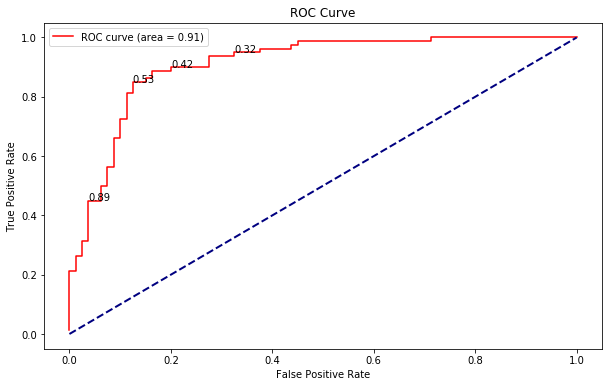

In [88]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_train,y_pred_train_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

In [89]:
#best hreshhold value is 0.53